In [82]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from matplotlib import pyplot as plt

In [83]:
#load the data
data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/'
                   'arrhythmia/arrhythmia.data', header=None, sep=',', engine='python')

display(data.head(3))

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10


In [84]:
print('%d rows and %d columns' % (data.shape[0],data.shape[1]))

452 rows and 280 columns


In [85]:
np.unique(data[len(data.columns)-1])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 14, 15, 16], dtype=int64)

In [86]:
data['arrhythmia'] = data[len(data.columns)-1].map(lambda x: 0 if x==1 else 1)
data = data.drop(len(data.columns)-2, axis=1)

In [87]:
print(data.head(3))

    0  1    2   3    4    5    6    7    8   9  ...  270  271  272  273  274  \
0  75  0  190  80   91  193  371  174  121 -16  ...  0.0  9.0 -0.9  0.0  0.0   
1  56  1  165  64   81  174  401  149   39  25  ...  0.0  8.5  0.0  0.0  0.0   
2  54  0  172  95  138  163  386  185  102  96  ...  0.0  9.5 -2.4  0.0  0.0   

   275  276   277   278  arrhythmia  
0  0.9  2.9  23.3  49.4           1  
1  0.2  2.1  20.4  38.8           1  
2  0.3  3.4  12.3  49.0           1  

[3 rows x 280 columns]


In [88]:
data.groupby(['arrhythmia']).size()

arrhythmia
0    245
1    207
dtype: int64

In [89]:
data = data._get_numeric_data()
print('%d rows and %d columns' % (data.shape[0],data.shape[1]))

452 rows and 275 columns


In [90]:
data.head(3)

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,arrhythmia
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,1
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,1
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,1


In [91]:
X = data.iloc[:, :-1]  # The first to second-last columns are the features
y = data.iloc[:, -1]   # The last column is the ground-truth label
print(np.unique(y))
print(X.shape)

[0 1]
(452, 274)


In [92]:
# splitting the dataset to training and validation datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20181004)

In [93]:
# Standardizing the training and test datasets
# Note that we are scaling based on the information from the training data
# Then we apply the scaling that is done from training data to the test data
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
print(X_train_std.shape)

(361, 274)


In [129]:
class LogisticRegression(object):

    def __init__(self, eta=0.1, n_epoch=1000, random_state=3):
        """Feel free to change the hyperparameters"""
        self.eta = eta
        self.n_epoch = n_epoch
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_epoch):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            gradient_weights, gradient_bias = self.gradient(X, output, y)
            self.w_[1:] += self.eta * gradient_weights
            self.w_[0] += self.eta * gradient_bias
            cost = self.loss(output, y)
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def loss(self, output, y):
        """Calculate cross entropy loss"""
        # TODO
        # cross entropy loss function L(y, ŷ) = -[y log(ŷ) + (1 - y) log(1 - ŷ)]
        output = np.clip(output, 1e-12, 1-1e-12)
        return -y.dot(np.log(output))-((1-y).dot(np.log(1-output)))

    def gradient(self, X, output, y):
        """Calculate the partial derivative of cross entropy loss with respect to weights"""
        errors = (y - output)
        return errors.dot(X), errors.sum()

    def activation(self, z):
        """Compute logistic sigmoid activation"""
        # TODO
        # sigmoid function σ(x) = 1 / (1 + exp(-z))
        return 1.0 / (1.0 + np.exp(-z))

    def predict(self, X):
        """Return class label after unit step"""
        # TODO
        net_input = self.net_input(X)
        output = self.activation(net_input)
        return np.where(output >= 0.5, 1, 0)
        
        

In [130]:
model = LogisticRegression()
model.fit(X_train_std, y_train)

0.1333762688787064


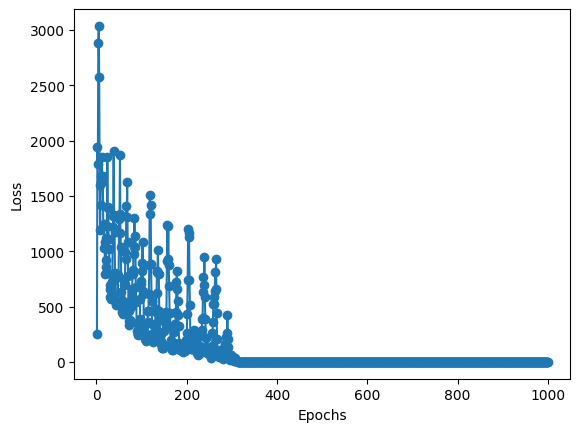

In [131]:
# plot loss curve
print(model.cost_[-1])
plt.plot(range(1, len(model.cost_)+1), model.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

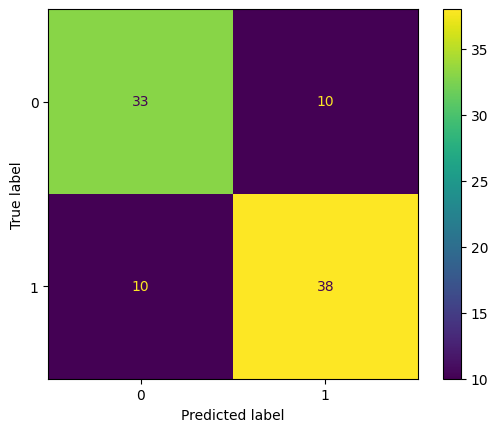

In [132]:
# plot confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = model.predict(X_test_std)
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [133]:
#　plot F1_score
f1_score(y_test, y_pred, pos_label=0)

0.7674418604651163